In [14]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit import Aer
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

n =  7


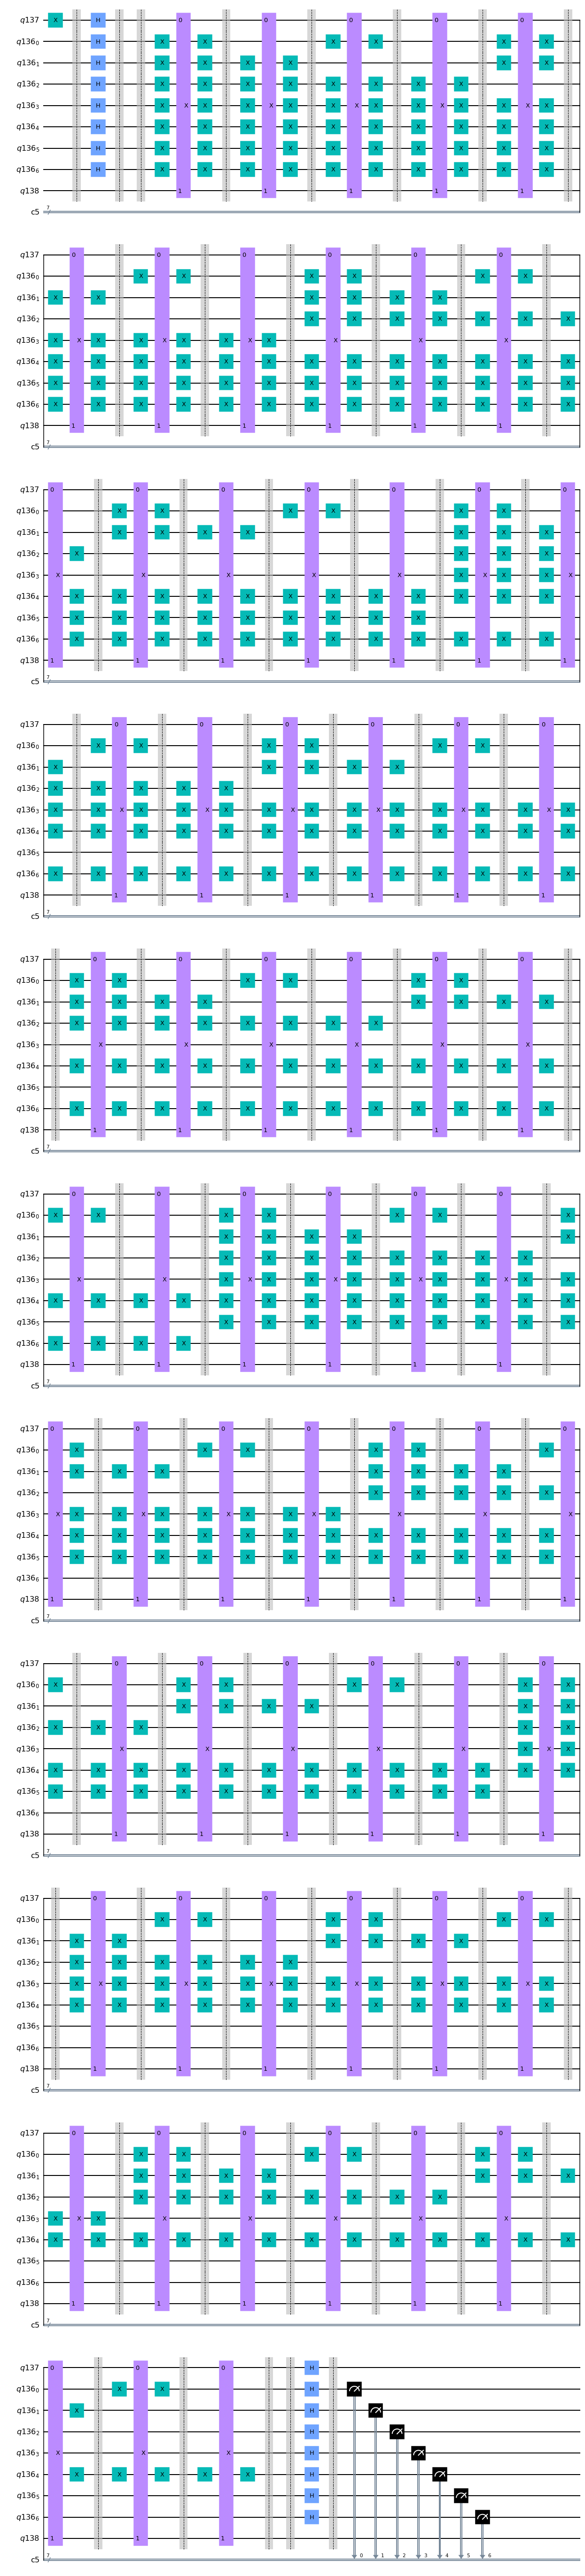

In [15]:
f = '11111111111111110000000000000000111111111111111100000000000000001111111111111111000000000000000011111111111111110000000000000000'

N = len(f)
n = int(np.log2(N))

print('n = ', n)

Qc = QuantumRegister(n)
Qt = QuantumRegister(1)
C = ClassicalRegister(n)

if n > 4:
    Qa = QuantumRegister(1)
    circuito = QuantumCircuit(Qt, Qc, Qa, C)
else:
    circuito = QuantumCircuit(Qt, Qc, C)

circuito.x(Qt)
circuito.barrier()

circuito.h(Qc)
circuito.h(Qt)
circuito.barrier()
circuito.barrier()

for k in range(N):
    if f[k] == '1':
        fo = bin(int(k))[2:].zfill(n)
        for m in range(n):
            if fo[m] == '0':
                circuito.x(Qc[n - m - 1])            

        if n > 4:
            circuito.mct(Qc, Qt, Qa, mode='advanced')
        else:
            circuito.mct(Qc, Qt, None, mode='advanced')
        
        for m in range(n):
            if fo[m] == '0':
                circuito.x(Qc[n - m - 1])

        circuito.barrier()

circuito.barrier()

circuito.h(Qc)
circuito.h(Qt)
circuito.barrier()

circuito.measure(Qc, C)

circuito.draw(output='mpl')

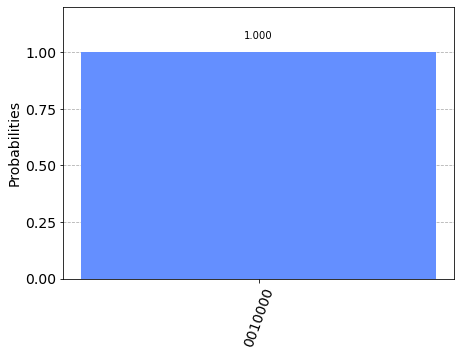

In [13]:
simulador = BasicAer.get_backend('qasm_simulator')
job = execute(circuito, simulador, shots=8192)
resultado = job.result()
contagem = resultado.get_counts()
plot_histogram(contagem)